In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Create a synthetic dataset with two classes
X, y = datasets.make_blobs(n_samples=1800, centers=2, random_state=50)

In [3]:
X

array([[-5.59766780e+00, -1.29455317e+00],
       [-5.72132654e+00, -3.74663114e-01],
       [-5.65957895e+00, -1.16750892e+00],
       ...,
       [-4.80343328e+00, -2.74661894e+00],
       [ 1.86369887e+00, -3.22081487e+00],
       [ 2.92957402e-03, -6.85922749e+00]])

In [4]:
y

array([1, 1, 1, ..., 1, 0, 0])

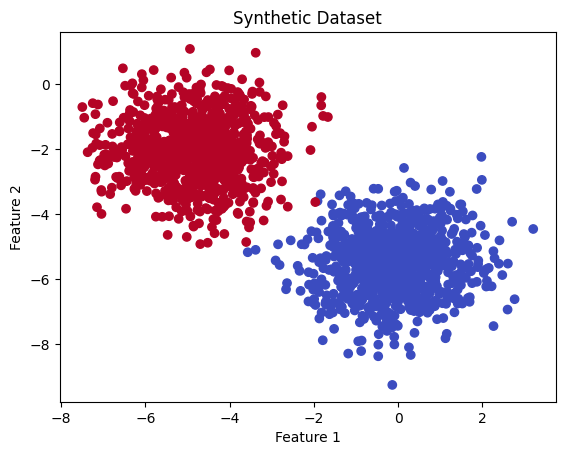

In [5]:
# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title("Synthetic Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Create an SVM classifier with a linear kernel
model = svm.SVC(kernel='linear')

In [8]:
# Train the model
model.fit(X_train, y_train)

SVC(kernel='linear')

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [10]:
# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[176   0]
 [  0 184]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       176
           1       1.00      1.00      1.00       184

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360



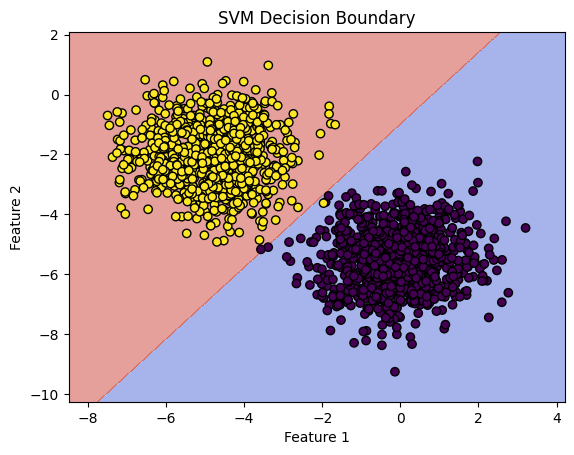

In [11]:
# Create a function to plot the decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title("SVM Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot the decision boundary
plot_decision_boundary(model, X, y)

In [12]:
# Function to take user input and make predictions
def predict_class(model):
    try:
        # Take input for two features
        feature_1 = float(input("Enter value for Feature 1: "))
        feature_2 = float(input("Enter value for Feature 2: "))
        
        # Create a numpy array with the input values
        input_data = np.array([[feature_1, feature_2]])
        
        # Make a prediction using the trained model
        prediction = model.predict(input_data)
        
        # Print the result
        print(f"The predicted class for the input data [{feature_1}, {feature_2}] is: {prediction[0]}")
    
    except ValueError:
        print("Invalid input. Please enter numerical values for both features.")

In [13]:
# Call the predict_class function to predict based on user input
predict_class(model)

Enter value for Feature 1:  2
Enter value for Feature 2:  2


The predicted class for the input data [2.0, 2.0] is: 1


Example 2: Diabetes Dataset

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm

In [16]:
df = pd.read_csv('./../datafiles/diabetes.csv')


In [17]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
# Checking for missing values.
df.isnull().values.any()

np.False_

In [24]:
#feature Engineering

zero_not_allowed = ["Glucose","BloodPressure","SkinThickness"]

for column in zero_not_allowed:
    df[column] = df[column].replace(0, np.nan)
    mean = int(df[column].mean(skipna = True))
    df[column] = df[column].replace(np.nan, mean)

In [26]:
# Splitting the dataset into training and testing sets.
x = df.iloc[:, :-2]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

In [27]:
# Creating the SVM model.
clf = svm.SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8051948051948052


In [29]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)


array([[96, 11],
       [19, 28]])

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.72      0.60      0.65        47

    accuracy                           0.81       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154

